## Welcome to my First Data Mining Project!!!

In [1]:
# import packages
import pandas as pd

In [ ]:
# Load in dataset

coll_student_sleep_data = pd.read_csv(r"C:\Users\jonat\Downloads\college_student_sleep_data2.csv")

In [ ]:
# Ensure dataset loaded correctly

coll_student_sleep_data.head()

,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average


In [8]:
# Create new dataset with specific questions for my project

filtered_coll_student_sleep_data = coll_student_sleep_data.drop(columns=["Timestamp", "1. What is your year of study?", 
    "2. What is your gender?", "11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?",
    "12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",
     "13. How often do you engage in physical activity or exercise?"])

In [19]:
filtered_coll_student_sleep_data

,3. How often do you have difficulty falling asleep at night?,hours_sleeping,sleep_interruptions,sleep_quality,class_focus,daily_fatigue,class_absences,assignment_impact,stress_levels,performance_satisfaction
0,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,High stress,Average
1,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Low stress,Good
2,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,High stress,Below Average
3,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Extremely high stress,Excellent
4,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Low stress,Average
...,...,...,...,...,...,...,...,...,...,...
991,Often (5-6 times a week),More than 8 hours,Every night,Very good,Often,Always,Sometimes (1-2 times a week),Severe impact,Extremely high stress,Average
992,Rarely (1-2 times a week),6-7 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Sometimes (1-2 times a week),Major impact,Low stress,Good
993,Never,More than 8 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Rarely (1-2 times a month),No impact,High stress,Average
994,Sometimes (3-4 times a week),Less than 4 hours,Never,Average,Never,Rarely,Often (3-4 times a week),Major impact,Extremely high stress,Excellent


In [ ]:
# Check column names for debugging - need to copy the actual questions
print(filtered_coll_student_sleep_data.columns.tolist())

['3. How often do you have difficulty falling asleep at night? ', 'hours_sleeping', 'sleep_interruptions', 'sleep_quality', 'class_focus', 'daily_fatigue', 'class_absences', 'assignment_impact', 'stress_levels', 'performance_satisfaction']


In [27]:
# Create a dictionary to create simple names for survey qeustions
question_dictionary = {
    "3. How often do you have difficulty falling asleep at night? ": "difficulty_sleeping",
    "4. On average, how many hours of sleep do you get on a typical day?": "hours_sleeping",
    "5. How often do you wake up during the night and have trouble falling back asleep?": "sleep_interruptions",
    "6. How would you rate the overall quality of your sleep?": "sleep_quality",
    "class_focus": "issues_w_class_focus", #The question is 'How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?', messed up label so had to redo
    "8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?": "daily_fatigue",
    "9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?": "class_absences",
    "10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?": "assignment_impact",
    "14. How would you describe your stress levels related to academic workload?": "stress_levels",
    "15. How would you rate your overall academic performance (GPA or grades) in the past semester?": "performance_satisfaction"
}

In [28]:
# Rename columns using the dictionary
renamed_coll_student_sleep_data = filtered_coll_student_sleep_data.rename(columns=question_dictionary)

In [29]:
renamed_coll_student_sleep_data

,difficulty_sleeping,hours_sleeping,sleep_interruptions,sleep_quality,issues_w_class_focus,daily_fatigue,class_absences,assignment_impact,stress_levels,performance_satisfaction
0,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,High stress,Average
1,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Low stress,Good
2,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,High stress,Below Average
3,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Extremely high stress,Excellent
4,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Low stress,Average
...,...,...,...,...,...,...,...,...,...,...
991,Often (5-6 times a week),More than 8 hours,Every night,Very good,Often,Always,Sometimes (1-2 times a week),Severe impact,Extremely high stress,Average
992,Rarely (1-2 times a week),6-7 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Sometimes (1-2 times a week),Major impact,Low stress,Good
993,Never,More than 8 hours,Sometimes (3-4 times a week),Average,Rarely,Rarely,Rarely (1-2 times a month),No impact,High stress,Average
994,Sometimes (3-4 times a week),Less than 4 hours,Never,Average,Never,Rarely,Often (3-4 times a week),Major impact,Extremely high stress,Excellent


In [32]:
# Check for missing values

renamed_coll_student_sleep_data.isnull().sum()

# No missing values... yay!

difficulty_sleeping         0
hours_sleeping              0
sleep_interruptions         0
sleep_quality               0
issues_w_class_focus        0
daily_fatigue               0
class_absences              0
assignment_impact           0
stress_levels               0
performance_satisfaction    0
dtype: int64

In [ ]:
# Use for loop to print out unique values in each column for pre-processing

for column in renamed_coll_student_sleep_data.columns:
    print(f"{column}: {renamed_coll_student_sleep_data[column].unique()}\n")

difficulty_sleeping: ['Often (5-6 times a week)' 'Sometimes (3-4 times a week)' 'Every night'
 'Rarely (1-2 times a week)' 'Never']

hours_sleeping: ['7-8 hours' 'More than 8 hours' '6-7 hours' '4-5 hours'
 'Less than 4 hours']

sleep_interruptions: ['Often (5-6 times a week)' 'Sometimes (3-4 times a week)' 'Every night'
 'Rarely (1-2 times a week)' 'Never']

sleep_quality: ['Good' 'Poor' 'Very good' 'Average' 'Very poor']

issues_w_class_focus: ['Sometimes' 'Often' 'Always' 'Rarely' 'Never']

daily_fatigue: ['Often' 'Sometimes' 'Rarely' 'Always' 'Never']

class_absences: ['Often (3-4 times a week)' 'Sometimes (1-2 times a week)'
 'Rarely (1-2 times a month)' 'Always' 'Never']

assignment_impact: ['Moderate impact' 'Major impact' 'Minor impact' 'No impact'
 'Severe impact']

stress_levels: ['High stress' 'Low stress' 'Extremely high stress' 'No stress']

performance_satisfaction: ['Average' 'Good' 'Below Average' 'Excellent' 'Poor']



### For this project, I will have all values on a 1-5 scale, 5 being the best option and 1 being the worst option

In [40]:
# Create a mapping dictionary to set all values to ints for better analysis
value_mapping = {
    "difficulty_sleeping": {
        "Every night": 1,
        "Often (5-6 times a week)": 2,
        "Sometimes (3-4 times a week)": 3,
        "Rarely (1-2 times a week)": 4,
        "Never": 5
    },
    "hours_sleeping": {
        "Less than 4 hours": 1,
        "4-5 hours": 2,
        "6-7 hours": 3,
        "7-8 hours": 4,
        "More than 8 hours": 5
    },
    "sleep_interruptions": {
        "Every night": 1,
        "Often (5-6 times a week)": 2,
        "Sometimes (3-4 times a week)": 3,
        "Rarely (1-2 times a week)": 4,
        "Never": 5
    },
    "sleep_quality": {
        "Very poor": 1,
        "Poor": 2,
        "Average": 3,
        "Good": 4,
        "Very good": 5
    },
    "issues_w_class_focus": {
        "Always": 1,
        "Often": 2,
        "Sometimes": 3,
        "Rarely": 4,
        "Never": 5
    },
    "daily_fatigue": {
        "Always": 1,
        "Often": 2,
        "Sometimes": 3,
        "Rarely": 4,
        "Never": 5
    },
    "class_absences": {
        "Always": 1,
        "Often (3-4 times a week)": 2,
        "Sometimes (1-2 times a week)": 3,
        "Rarely (1-2 times a month)": 4,
        "Never": 5
    },
    "assignment_impact": {
        "Severe impact": 1,
        "Major impact": 2,
        "Moderate impact": 3,
        "Minor impact": 4,
        "No impact": 5
    },
    "stress_levels": {
        "Extremely high stress": 1,
        "High stress": 2,
        "Low stress": 3,
        'Extremely low stress': 4,
        "No stress": 5
    },
    "performance_satisfaction": {
        "Poor": 1,
        "Below Average": 2,
        "Average": 3,
        "Good": 4,
        "Excellent": 5
    }
}

In [41]:
numbered_coll_student_sleep_data = renamed_coll_student_sleep_data.replace(value_mapping)

C:\Users\jonat\AppData\Local\Temp\ipykernel_22384\652224119.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  numbered_coll_student_sleep_data = renamed_coll_student_sleep_data.replace(value_mapping)


In [42]:
numbered_coll_student_sleep_data

,difficulty_sleeping,hours_sleeping,sleep_interruptions,sleep_quality,issues_w_class_focus,daily_fatigue,class_absences,assignment_impact,stress_levels,performance_satisfaction
0,2,4,2,4,3,2,2,3,2,3
1,2,4,2,4,2,3,3,2,3,4
2,3,4,3,4,2,2,3,2,2,2
3,2,5,3,2,2,2,4,4,1,5
4,2,4,2,5,1,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...
991,2,5,1,5,2,1,3,1,1,3
992,4,3,3,3,4,4,3,2,3,4
993,5,5,3,3,4,4,4,5,2,3
994,3,1,5,3,5,4,2,2,1,5


In [ ]:
# check unique values again to ensure the mapping method worked correctly 

for column in numbered_coll_student_sleep_data.columns:
    print(f"{column}: {numbered_coll_student_sleep_data[column].unique()}\n")

difficulty_sleeping: [2 3 1 4 5]

hours_sleeping: [4 5 3 2 1]

sleep_interruptions: [2 3 1 4 5]

sleep_quality: [4 2 5 3 1]

issues_w_class_focus: [3 2 1 4 5]

daily_fatigue: [2 3 4 1 5]

class_absences: [2 3 4 1 5]

assignment_impact: [3 2 4 5 1]

stress_levels: [2 3 1 5]

performance_satisfaction: [3 4 2 5 1]



In [44]:
# import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# We are going to use a heatmap to look at the frequency of each value in each column

In [47]:
# To do that, we need a sum for every value in each column
value_counts = numbered_coll_student_sleep_data.apply(lambda x: x.value_counts()).fillna(0).astype(int)

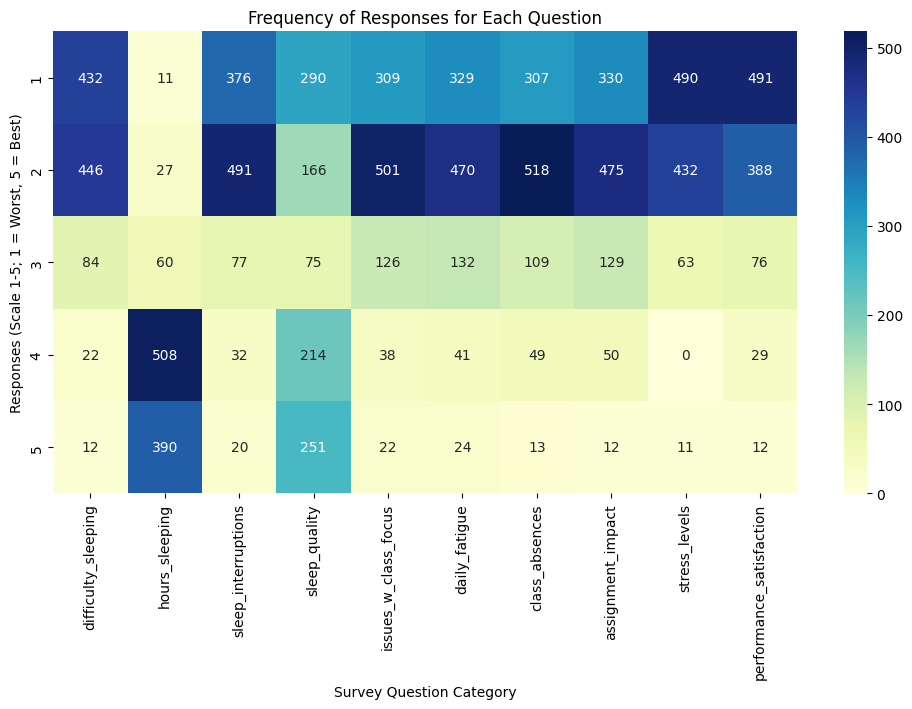

In [ ]:
# Using the value counts, use seaborn to create a heatmap to show the frequency of each response for each question

plt.figure(figsize=(12, 6))
sns.heatmap(value_counts, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Frequency of Responses for Each Question")
plt.xlabel("Survey Question Category")
plt.ylabel("Responses (Scale 1-5; 1 = Worst, 5 = Best)")
plt.show()

# We clearly see from this that most people surveyed struggled with falling sleeping, staying asleep, and were not satisfied with their class or academic performance